In [1]:
# import findspark
# findspark.init()
# findspark.find()

In [2]:
from pyspark import SparkContext
from pyspark.sql.session import SparkSession

In [3]:
sc = SparkContext()
spark = SparkSession(sc)

In [4]:
data = spark.read.option("header",True).csv('hdfs://hadoop-master:9000/preprocess_data.csv')
data

DataFrame[title: string, year: string, rating: string, runtime: string, kind: string, color_info: string, sound_mix: string, director_name: string, genre: string, director_id: string, cast_names: string, cast_ids: string, votes: string, country: string, day: string, month: string]

In [5]:
data.printSchema()

root
 |-- title: string (nullable = true)
 |-- year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- kind: string (nullable = true)
 |-- color_info: string (nullable = true)
 |-- sound_mix: string (nullable = true)
 |-- director_name: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- director_id: string (nullable = true)
 |-- cast_names: string (nullable = true)
 |-- cast_ids: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- country: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)



In [6]:
df = data.toPandas()

In [7]:
import pandas as pd

In [8]:
df= df[pd.to_numeric(df['rating'], errors='coerce').notnull()]

In [9]:
country_list = df['country'].value_counts()[0:20].index
country_list

Index(['USA', 'France', 'India', 'UK', 'Italy', 'Japan', 'Canada', 'Germany',
       'Vietnam', 'Hong Kong', 'Spain', 'South Korea', 'Turkey', 'Sweden',
       'Australia', 'West Germany', 'Belgium', 'Denmark', 'Brazil', 'Russia'],
      dtype='object')

In [10]:
df['country'] = df.country.apply(lambda s: s if s in country_list else 'Others')

<AxesSubplot:ylabel='country'>

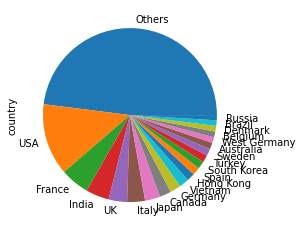

In [11]:
df.country.value_counts().plot(kind='pie')

In [12]:
df['rating'] = df['rating'].astype(float)
df['runtime'] = df['runtime'].astype(float)

<AxesSubplot:ylabel='Frequency'>

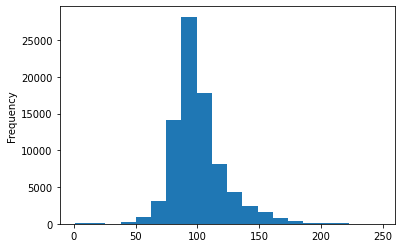

In [13]:
df_runtime = df[(df["runtime"] < 250) & (df["kind"] == 'movie')] 
df_runtime.runtime.plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

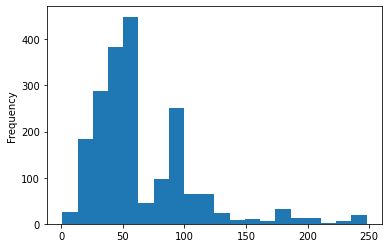

In [14]:
df_tv = df[(df["runtime"] < 250) & (df["kind"] != 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

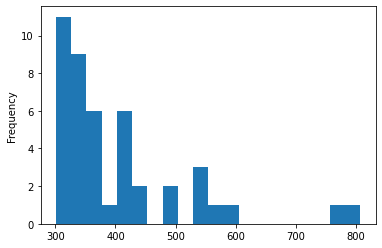

In [15]:
df_tv = df[(df["runtime"] > 300) & (df["kind"] == 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

<AxesSubplot:xlabel='runtime', ylabel='rating'>

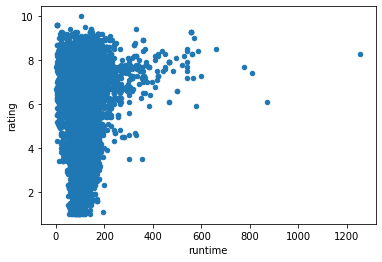

In [16]:
df.plot.scatter(x='runtime', y='rating')

<AxesSubplot:xlabel='runtime', ylabel='rating'>

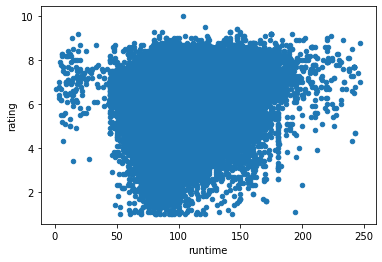

In [17]:
df_runtime.plot.scatter(x='runtime', y='rating')

<AxesSubplot:xlabel='runtime', ylabel='rating'>

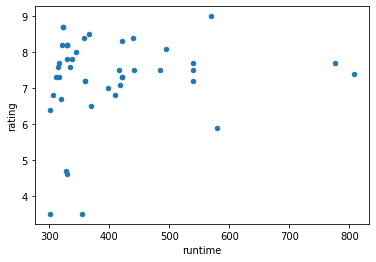

In [18]:
df_tv.plot.scatter(x='runtime', y='rating')

<AxesSubplot:ylabel='year'>

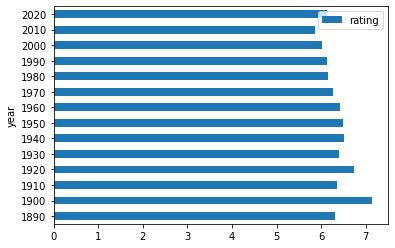

In [19]:
year_rating = df[['year', 'rating']]
year_rating = year_rating[pd.to_numeric(year_rating['year'], errors='coerce').notnull()]
plot_year_rating = year_rating.groupby(['year']).mean().reset_index()
plot_year_rating['year'] = plot_year_rating['year'].astype(int)
plot_year_rating['year'] = plot_year_rating.year.apply(lambda s: s//10*10)
real_plot_year_rating = plot_year_rating.groupby(['year']).mean().reset_index()
real_plot_year_rating.plot.barh(x='year',y='rating',rot=0)

<AxesSubplot:ylabel='color_info'>

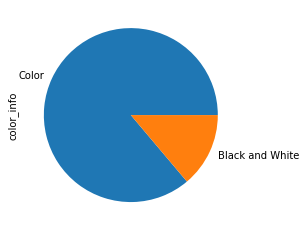

In [20]:
df.color_info.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='color_info'>

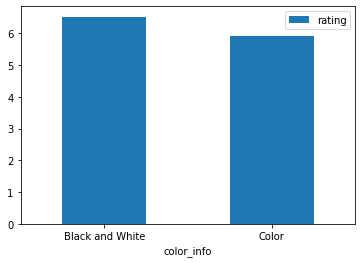

In [21]:
rating_color = df[['rating', 'color_info']]
mean_color = rating_color.groupby(['color_info']).mean().reset_index()
mean_color.plot.bar(x='color_info',y='rating',rot=0)

<AxesSubplot:title={'center':'Black and White movie over time'}>

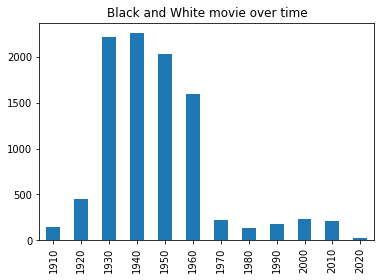

In [22]:
color = df[['year', 'color_info']]
color_black = color[color['color_info'] == 'Black and White']
color_black = color_black[pd.to_numeric(color_black['year'], errors='coerce').notnull()]
color_black['year'] = color_black['year'].astype(int)
color_black['year'] = color_black.year.apply(lambda s: s//10*10)
color_black = color_black[color_black['year'] >= 1910]
color_black['year'].value_counts().sort_index().plot(kind='bar', title='Black and White movie over time')

<AxesSubplot:title={'center':'Color movie over time'}>

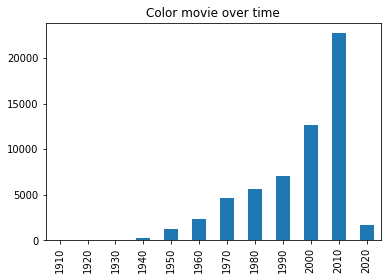

In [23]:
color_color = color[color['color_info'] == 'Color']
color_color = color_color[pd.to_numeric(color_color['year'], errors='coerce').notnull()]
color_color['year'] = color_color['year'].astype(int)
color_color['year'] = color_color.year.apply(lambda s: s//10*10)
# color_black['year']
color_color['year'].value_counts().sort_index().plot(kind='bar', title='Color movie over time')

<AxesSubplot:xlabel='year'>

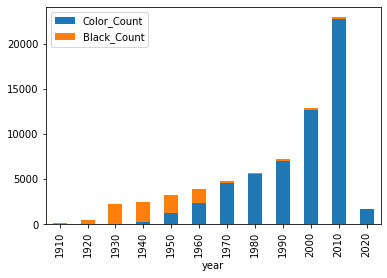

In [24]:
black = color_black['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Black_Count')
color = color_color['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Color_Count')
color['Black_Count'] = black['Black_Count']
color.set_index('year', inplace=True)

color.plot.bar(stacked=True)